<a href="https://colab.research.google.com/github/Guliko24/CF969_SU/blob/main/Lab6_another_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

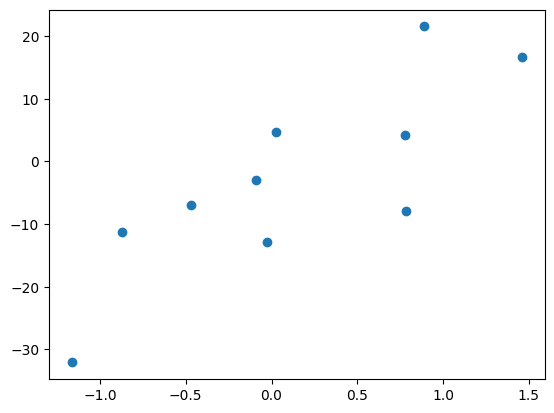

In [3]:
#Lab 6 Regression and Regularisation #Computation Finance#

# Let's import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
rng = np.random


 #We define the learning parameters
learning_rate = 0.01 # how quickly do we adjust based on the observed error
training_steps = 1000 # how long do we train for ( we called it iteration in NN)
display_step = 50 # how ofter should we print on the screen

# Training Data. These were arbitrarily selected. Feel free to play with different values.
X = np.array([[-1.16552626], [-0.0894637], [-0.46733838], [-0.87232152], [0.02687546], [0.8893861], [-0.02914397], [0.78094479], [0.77965428], [1.46220924]])
Y = np.array(
[-32.08941276,  -3.02685324,  -6.89483993, -11.28719275,   4.77239585, 21.53298882, -12.93092601,  -7.83955722, 4.22214083, 16.68774553])

# Let's plot the data. We will plot them again later.
plt.scatter(X,Y)

# Weight and Bias, initialized randomly.
slope = tf.Variable(rng.randn(), name="slope")
intercept = tf.Variable(rng.randn(), name="intercept")

# Linear regression (ax + b). This is where the define the corresponding function.
# In particular, we are given in input a variable x and we output ax+b

def linear_regression(x):
    return slope* x + intercept

# Mean square error. This is where we define the error function.
# For each data point, we compute (predicted_value - true_value)^2 and sum over all data points
# Recall from the lectures that just taking into account the actual error is not a good idea
# as positive and negative errors cancel out

def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

# Optimization process.
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X) # this is our prediction
        loss = mean_square(pred, Y) # this captures our error function

    # Compute gradients. Since we have two variables, we get two gradients.
    gradients = g.gradient(loss, [slope, intercept])

    # Update a and b following gradients. What does zip do? Can you figure it out?
    optimizer.apply_gradients(zip(gradients, [slope, intercept]))

In [4]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update a and b values.
    run_optimization()

    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, a: %f, b: %f" % (step, loss, slope.numpy(), intercept.numpy()))

step: 50, loss: 216.518066, a: 0.433246, b: -1.700552
step: 100, loss: 215.461136, a: 0.169319, b: -2.348573
step: 150, loss: 215.332230, a: 0.068994, b: -2.571423
step: 200, loss: 215.316391, a: 0.029481, b: -2.647498
step: 250, loss: 215.314392, a: 0.013233, b: -2.673159
step: 300, loss: 215.314148, a: 0.006221, b: -2.681643
step: 350, loss: 215.314102, a: 0.003043, b: -2.684352
step: 400, loss: 215.314102, a: 0.001537, b: -2.685163
step: 450, loss: 215.314102, a: 0.000795, b: -2.685372
step: 500, loss: 215.314117, a: 0.000418, b: -2.685405
step: 550, loss: 215.314102, a: 0.000222, b: -2.685396
step: 600, loss: 215.314102, a: 0.000119, b: -2.685384
step: 650, loss: 215.314087, a: 0.000065, b: -2.685372
step: 700, loss: 215.314102, a: 0.000035, b: -2.685361
step: 750, loss: 215.314102, a: 0.000019, b: -2.685359
step: 800, loss: 215.314087, a: 0.000011, b: -2.685358
step: 850, loss: 215.314102, a: 0.000006, b: -2.685358
step: 900, loss: 215.314102, a: 0.000004, b: -2.685357
step: 950, 

In [7]:


# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
# now we fit the data and compute the slope and the intercept
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)
print("slope: ",reg.coef_)
print("intercept: ", reg.intercept_)

slope:  [15.10776168]
intercept:  -4.6724387837037185
